### Rock Paper Scissor - Multi Class

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
from shutil import copyfile

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /content/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /content/rps-test-set.zip

--2021-10-10 14:22:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/content/rps.zip’

/content/rps.zip    100%[===================>] 191.38M  99.6MB/s    in 1.9s    

2021-10-10 14:22:23 (99.6 MB/s) - ‘/content/rps.zip’ saved [200682221/200682221]

--2021-10-10 14:22:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
S

In [ ]:
import os
import zipfile

local_zip = '/content/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

local_zip = '/content/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# training set

rock_dir = os.path.join('/content/rps/rock')
paper_dir = os.path.join('/content/rps/paper')
scissors_dir = os.path.join('/content/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:5])

paper_files = os.listdir(paper_dir)
print(paper_files[:5])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:5])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-021.png', 'rock03-060.png', 'rock05ck01-096.png', 'rock07-k03-081.png', 'rock03-073.png']
['paper03-011.png', 'paper06-093.png', 'paper02-001.png', 'paper04-107.png', 'paper04-081.png']
['testscissors03-004.png', 'scissors04-051.png', 'scissors02-006.png', 'testscissors02-028.png', 'scissors04-103.png']


In [ ]:
# validation set

val_rock_dir = os.path.join('/content/rps-test-set/rock')
val_paper_dir = os.path.join('/content/rps-test-set/paper')
val_scissors_dir = os.path.join('/content/rps-test-set/scissors')

print('total test rock images:', len(os.listdir(val_rock_dir)))
print('total test paper images:', len(os.listdir(val_paper_dir)))
print('total test scissors images:', len(os.listdir(val_scissors_dir)))

total test rock images: 124
total test paper images: 124
total test scissors images: 124


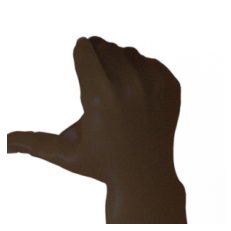

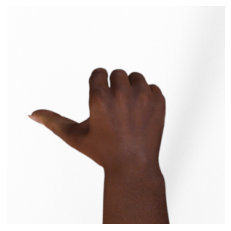

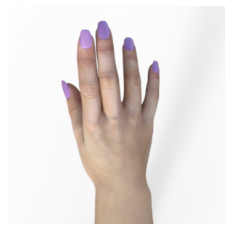

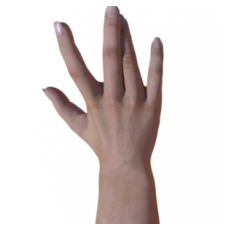

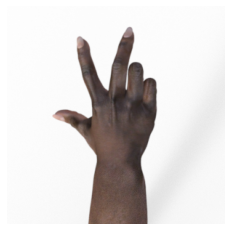

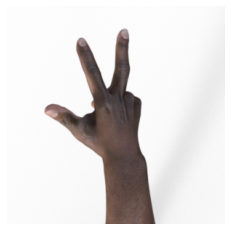

In [ ]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
IMG_HEIGHT = 150        
IMG_WIDTH = 150
CHANNELS = 3
NUM_CLASSES = 3

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
optimizer   = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "/content/rps/"

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')        

train_generator = train_datagen.flow_from_directory(
                                  TRAIN_DIR,   
                                  target_size = (IMG_HEIGHT, IMG_WIDTH),       # same as input image size
                                  batch_size = 41,             
                                  seed = 20,                      
                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.


In [ ]:
VALID_DIR = "/content/rps-test-set/"

valid_datagen = ImageDataGenerator(rescale = 1./255.)

valid_generator = valid_datagen.flow_from_directory(
                                  VALID_DIR, 
                                  target_size = (IMG_HEIGHT, IMG_WIDTH),  
                                  batch_size = 41,
                                  seed = 20,
                                  class_mode = 'categorical')

Found 372 images belonging to 3 classes.


In [ ]:
early_stopping    = EarlyStopping(monitor='val_accuracy', patience=10)
reduce_lr         = ReduceLROnPlateau(monitor='val_accuracy', patience=10, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_accuracy', filepath='./best_model.h5', save_best_only=True)

In [ ]:
EPOCHS = 20
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [ ]:
history = model.fit(train_generator,
                  # steps_per_epoch = 20,                          # steps_per_epoch = total training records / batch size
                    validation_data = valid_generator,
                  # validation_steps = 3,                          # validation_steps = total validation records / batch size
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/20
62/62 [==============================] - 54s 374ms/step - loss: 1.1044 - accuracy: 0.4012 - val_loss: 0.8323 - val_accuracy: 0.6828
Epoch 2/20
62/62 [==============================] - 23s 370ms/step - loss: 0.8483 - accuracy: 0.6163 - val_loss: 0.4783 - val_accuracy: 0.6694
Epoch 3/20
62/62 [==============================] - 23s 370ms/step - loss: 0.6087 - accuracy: 0.7460 - val_loss: 0.2350 - val_accuracy: 0.9785
Epoch 4/20
62/62 [==============================] - 23s 366ms/step - loss: 0.4775 - accuracy: 0.8056 - val_loss: 0.1428 - val_accuracy: 0.9731
Epoch 5/20
62/62 [==============================] - 23s 365ms/step - loss: 0.3887 - accuracy: 0.8440 - val_loss: 0.1370 - val_accuracy: 0.9677
Epoch 6/20
62/62 [==============================] - 23s 368ms/step - loss: 0.2885 - accuracy: 0.8849 - val_loss: 0.3915 - val_accuracy: 0.8548
Epoch 7/20
62/62 [==============================] - 23s 364ms/step - loss: 0.2608 - accuracy: 0.9079 - val_loss: 0.1441 - val_accuracy: 0.9597

In [ ]:
model.evaluate(valid_generator)

10/10 [==============================] - 1s 124ms/step - loss: 0.1558 - accuracy: 0.9113


[0.15580913424491882, 0.9112903475761414]

<Figure size 432x288 with 0 Axes>

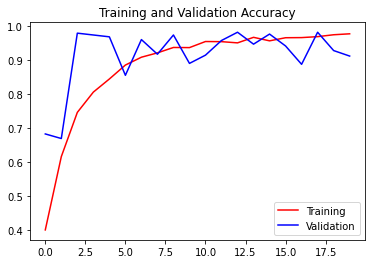

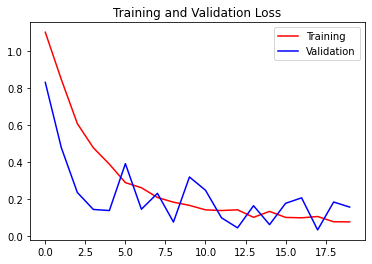

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.save("rps.h5")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving scissors9.png to scissors9.png
scissors9.png
[[0. 0. 1.]]


## Sign Language MNIST

#### Exercise 8

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [1]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
train_data = pd.read_csv('sign_mnist_train.csv', delimiter=',')
test_data = pd.read_csv('sign_mnist_test.csv', delimiter=',')

In [3]:
train_data.shape, test_data.shape

((27455, 785), (7172, 785))

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [5]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')         # getting data with csv.reader
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

In [6]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [7]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
training_labels[:5]

array([ 3.,  6.,  2.,  2., 13.])

In [36]:
testing_labels[:5]

array([ 6.,  5., 10.,  0.,  3.])

In [10]:
np.unique(training_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [11]:
IMG_HEIGHT = 28        
IMG_WIDTH = 28
CHANNELS = 1
NUM_CLASSES = 26

In [27]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')        

train_generator = train_datagen.flow(
                                  training_images,
                                  training_labels,
                                  seed = 20,
                                  batch_size=32)

In [29]:
valid_datagen = ImageDataGenerator(rescale = 1./255.)

valid_generator = valid_datagen.flow(
                                  testing_images, 
                                  testing_labels,
                                  seed = 20,
                                  batch_size = 20)

In [30]:
optimizer   = tf.keras.optimizers.Adam()
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

In [31]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [32]:
EPOCHS = 30

In [33]:
history = model.fit(train_generator,
                    steps_per_epoch = len(training_images)/32,
                    epochs = EPOCHS,
                    validation_data = valid_generator,
                    validation_steps = len(testing_images)/32,
                    verbose = 1)

Epoch 1/30
857/857 [==============================] - 11s 13ms/step - loss: 2.7269 - accuracy: 0.1707 - val_loss: 1.7767 - val_accuracy: 0.4247
Epoch 2/30
857/857 [==============================] - 11s 13ms/step - loss: 2.0470 - accuracy: 0.3528 - val_loss: 1.3509 - val_accuracy: 0.5307
Epoch 3/30
857/857 [==============================] - 11s 13ms/step - loss: 1.6813 - accuracy: 0.4606 - val_loss: 1.1021 - val_accuracy: 0.6329
Epoch 4/30
857/857 [==============================] - 11s 13ms/step - loss: 1.4440 - accuracy: 0.5291 - val_loss: 0.8006 - val_accuracy: 0.7276
Epoch 5/30
857/857 [==============================] - 11s 12ms/step - loss: 1.2551 - accuracy: 0.5891 - val_loss: 0.5828 - val_accuracy: 0.8002
Epoch 6/30
857/857 [==============================] - 11s 12ms/step - loss: 1.1322 - accuracy: 0.6273 - val_loss: 0.7296 - val_accuracy: 0.7507
Epoch 7/30
857/857 [==============================] - 11s 13ms/step - loss: 1.0408 - accuracy: 0.6548 - val_loss: 0.5252 - val_accuracy:

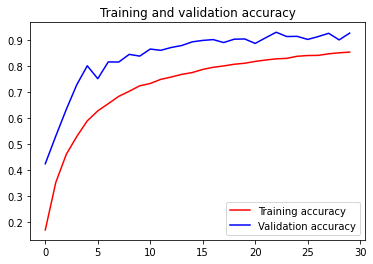

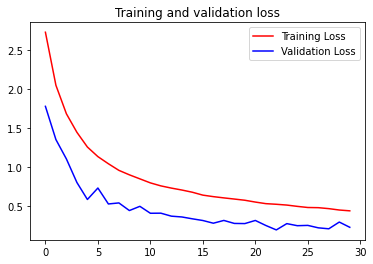

In [37]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
model.evaluate(testing_images, testing_labels)

225/225 [==============================] - 1s 3ms/step - loss: 478.3174 - accuracy: 0.5181


[478.3173828125, 0.5181260704994202]

In [40]:
y_test = model.predict(testing_images)
res = np.argmax(y_test, axis=1)

In [43]:
testing_labels[:20]

array([ 6.,  5., 10.,  0.,  3., 21., 10., 14.,  3.,  7.,  8.,  8., 21.,
       12.,  7.,  4., 22.,  0.,  7.,  7.])

In [44]:
res[:20]

array([ 5,  5, 10,  0, 17, 21, 10, 14, 17, 15,  8,  8, 21, 13,  8,  4, 22,
        8, 15, 15])